In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the datasets
tumour_data = pd.read_csv('sim_av_tumour.csv')
patient_data = pd.read_csv('sim_av_patient.csv')



C:\Users\jeril\AppData\Local\Temp\ipykernel_17616\3816858352.py:6: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  tumour_data = pd.read_csv('sim_av_tumour.csv')


In [2]:
# Merge the datasets on 'PATIENTID' with a left join
merged_data = pd.merge(patient_data, tumour_data, on='PATIENTID', how='left')

C:\Users\jeril\AppData\Local\Temp\ipykernel_17616\3393550890.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['VITALSTATUSDATE'] = pd.to_datetime(filtered_data['VITALSTATUSDATE'], errors='coerce')


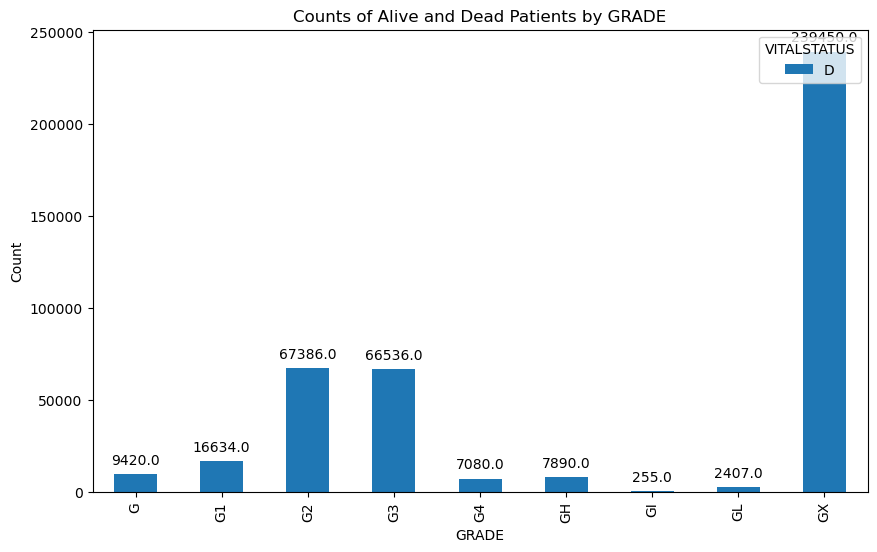

In [3]:
# Fill NaN values with 0
merged_data.fillna(0, inplace=True)

# Check for duplicates and drop them
merged_data.drop_duplicates(inplace=True)

# Define grade meanings
grade_meanings = {
    'G-BORDERLINE': 'MALIGNANCY',
    'G1': 'WELL DIFFERENTIATED',
    'G2': 'MODERATELY DIFFERENTIATED',
    'G3': 'POORLY DIFFERENTIATED',
    'G4': 'UNDIFFERENTIATED / ANAPLASTIC',
    'G5': 'T CELL',
    'G6': 'B CELL',
    'G7': 'NULL CELL',
    'GH': 'HIGH',
    'GL': 'LOW',
    'GI': 'INTERMEDIATE',
    'GX': "CAN'T BE DETERMINED"
}

# Select only the required columns
selected_columns = ['PATIENTID', 'GRADE', 'VITALSTATUS', 'VITALSTATUSDATE']
filtered_data = merged_data[selected_columns]

# Convert 'VITALSTATUSDATE' to datetime
filtered_data['VITALSTATUSDATE'] = pd.to_datetime(filtered_data['VITALSTATUSDATE'], errors='coerce')

# Filter out NaT values (missing or invalid dates)
filtered_data = filtered_data[filtered_data['VITALSTATUSDATE'].notna()]

# Extract data only where the year in 'VITALSTATUSDATE' is between 2016 and 2019
filtered_data['Year'] = filtered_data['VITALSTATUSDATE'].dt.year
filtered_data = filtered_data[(filtered_data['Year'] >= 2016) & (filtered_data['Year'] <= 2019)]

# Filter only rows where VITALSTATUS is 'A' or 'D'
filtered_data = filtered_data[filtered_data['VITALSTATUS'].isin(['A', 'D'])]

# Count the number of alive (A) and dead (D) patients at each GRADE
alive_dead_counts = filtered_data.groupby(['GRADE', 'VITALSTATUS']).size().unstack(fill_value=0)

# Create a bar chart to visualize the counts
ax = alive_dead_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title and labels
plt.title('Counts of Alive and Dead Patients by GRADE')
plt.xlabel('GRADE')
plt.ylabel('Count')

# Display the legend
plt.legend(title='VITALSTATUS', loc='upper right')

# Label each bar with its count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


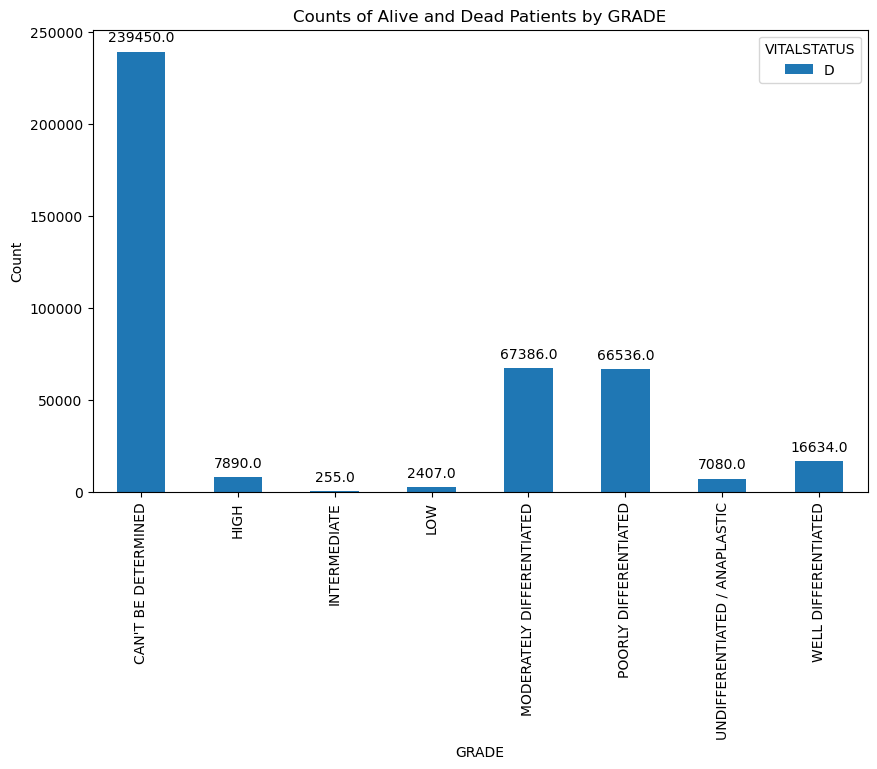

In [4]:
# Fill NaN values with 0
merged_data.fillna(0, inplace=True)

# Check for duplicates and drop them
merged_data.drop_duplicates(inplace=True)

# Define grade meanings
grade_meanings = {
    'G-BORDERLINE': 'MALIGNANCY',
    'G1': 'WELL DIFFERENTIATED',
    'G2': 'MODERATELY DIFFERENTIATED',
    'G3': 'POORLY DIFFERENTIATED',
    'G4': 'UNDIFFERENTIATED / ANAPLASTIC',
    'G5': 'T CELL',
    'G6': 'B CELL',
    'G7': 'NULL CELL',
    'GH': 'HIGH',
    'GL': 'LOW',
    'GI': 'INTERMEDIATE',
    'GX': "CAN'T BE DETERMINED"
}

# Select only the required columns
selected_columns = ['PATIENTID', 'GRADE', 'VITALSTATUS', 'VITALSTATUSDATE']

# Apply grade meanings to 'GRADE' column
merged_data['GRADE_MEANING'] = merged_data['GRADE'].map(grade_meanings)

# Filter out NaT values and convert 'VITALSTATUSDATE' to datetime
merged_data['VITALSTATUSDATE'] = pd.to_datetime(merged_data['VITALSTATUSDATE'], errors='coerce')
merged_data = merged_data[merged_data['VITALSTATUSDATE'].notna()]

# Extract data only where the year in 'VITALSTATUSDATE' is between 2016 and 2019
merged_data['Year'] = merged_data['VITALSTATUSDATE'].dt.year
merged_data = merged_data[(merged_data['Year'] >= 2016) & (merged_data['Year'] <= 2019)]

# Filter only rows where VITALSTATUS is 'A' or 'D'
filtered_data = merged_data[merged_data['VITALSTATUS'].isin(['A', 'D'])]

# Count the number of alive (A) and dead (D) patients at each GRADE_MEANING
alive_dead_counts = filtered_data.groupby(['GRADE_MEANING', 'VITALSTATUS']).size().unstack(fill_value=0)

# Create a bar chart to visualize the counts
ax = alive_dead_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the chart title and labels
plt.title('Counts of Alive and Dead Patients by GRADE')
plt.xlabel('GRADE')
plt.ylabel('Count')

# Display the legend
plt.legend(title='VITALSTATUS', loc='upper right')

# Label each bar with its count
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()